In [59]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [34]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [159]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [160]:
transported_0 = train_data[train_data['Transported'] == False]

In [161]:
transported_0

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
13,0010_01,Earth,False,G/1/S,TRAPPIST-1e,48.0,False,719.0,1.0,65.0,0.0,24.0,Reney Baketton,False
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False


In [162]:
transported_1 = train_data[train_data['Transported'] == True]

In [163]:
transported_1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

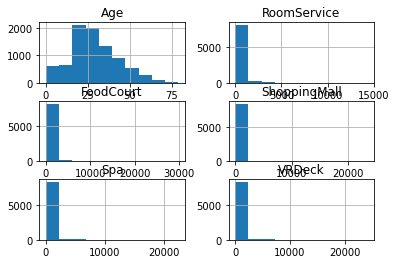

In [37]:
train_data.hist()

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [39]:
transported_ctr = Counter(train_data['Transported'])
transported_ctr

Counter({False: 4315, True: 4378})

In [40]:
def Ptransported(Transported):
    return transported_ctr[Transported] / len(train_data)

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Pth

Ptcryo Bishal

Ptcabin Bishal

Ptd  Bishal

Pta:
_ratul_

PtVIP:
_ratul_

Basel - Ptrs

Basel - Ptfc

Ptsm Josh

In [53]:
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())

In [117]:
from scipy.stats import expon

sm_loc, sm_scale = expon.fit(train_data['ShoppingMall'])

<AxesSubplot:ylabel='Frequency'>

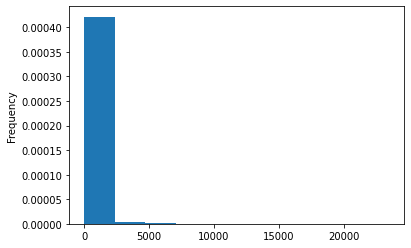

In [118]:
train_data.ShoppingMall.plot(kind='hist', density=True)

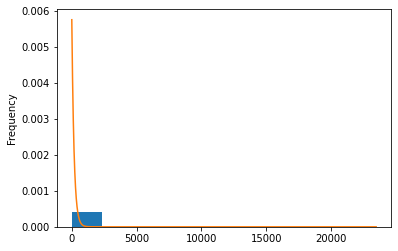

In [119]:
train_data.ShoppingMall.plot(kind='hist', density=True)
x = np.arange(0, train_data.ShoppingMall.max(), 0.01)

plt.plot(x, expon.pdf(x, loc=sm_loc, scale=sm_scale))

In [120]:
def Psm(ShoppingMall):
    return expon.pdf(ShoppingMall, loc=sm_loc, scale=sm_scale)

In [121]:
transported_0_loc, transported_0_scale = expon.fit(transported_0.ShoppingMall)

In [122]:
transported_1_loc, transported_1_scale = expon.fit(transported_1.ShoppingMall)

In [123]:
def PShoppingMall_Transported(ShoppingMall, Transported):
    if Transported == False:
        return expon.pdf(ShoppingMall, loc=transported_0_loc, scale=transported_0_scale)
    if Transported == True:
        return expon.pdf(ShoppingMall, loc=transported_1_loc, scale=transported_1_scale)

In [124]:
def Ptsm(Transported, ShoppingMall):
    return PShoppingMall_Transported(ShoppingMall, Transported) * Ptransported(Transported) / Psm(ShoppingMall)

PtVR Josh

In [ ]:
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())

In [ ]:
from scipy.stats import expon

sm_loc, sm_scale = expon.fit(train_data['ShoppingMall'])

<AxesSubplot:ylabel='Frequency'>

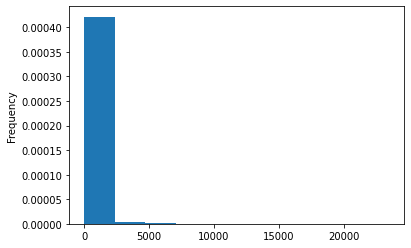

In [ ]:
train_data.ShoppingMall.plot(kind='hist', density=True)

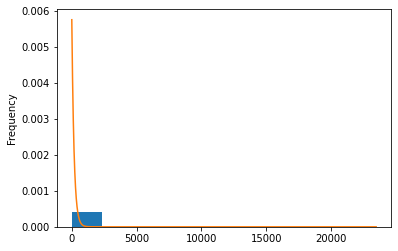

In [ ]:
train_data.ShoppingMall.plot(kind='hist', density=True)
x = np.arange(0, train_data.ShoppingMall.max(), 0.01)

plt.plot(x, expon.pdf(x, loc=sm_loc, scale=sm_scale))

In [ ]:
def Psm(ShoppingMall):
    return expon.pdf(ShoppingMall, loc=sm_loc, scale=sm_scale)

In [ ]:
transported_0_loc, transported_0_scale = expon.fit(transported_0.ShoppingMall)

In [ ]:
transported_1_loc, transported_1_scale = expon.fit(transported_1.ShoppingMall)

In [ ]:
def PShoppingMall_Transported(ShoppingMall, Transported):
    if Transported == False:
        return expon.pdf(ShoppingMall, loc=transported_0_loc, scale=transported_0_scale)
    if Transported == True:
        return expon.pdf(ShoppingMall, loc=transported_1_loc, scale=transported_1_scale)

In [ ]:
def Ptsm(Transported, ShoppingMall):
    return PShoppingMall_Transported(ShoppingMall, Transported) * Ptransported(Transported) / Psm(ShoppingMall)

PtSpa Josh

In [164]:
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].mean())

In [165]:
from scipy.stats import expon

spa_loc, spa_scale = expon.fit(train_data['Spa'])

<AxesSubplot:ylabel='Frequency'>

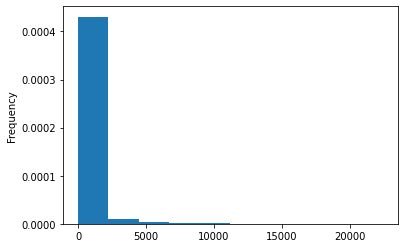

In [166]:
train_data.Spa.plot(kind='hist', density=True)

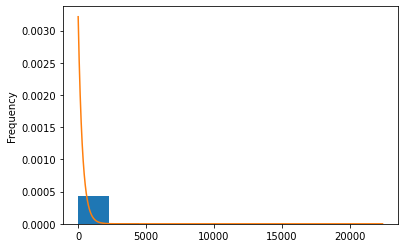

In [167]:
train_data.Spa.plot(kind='hist', density=True)
x = np.arange(0, train_data.Spa.max(), 0.01)

plt.plot(x, expon.pdf(x, loc=spa_loc, scale=spa_scale))

In [168]:
def Pspa(Spa):
    return expon.pdf(Spa, loc=spa_loc, scale=spa_scale)

In [169]:
transported_0_loc, transported_0_scale = expon.fit(transported_0.Spa)

In [170]:
transported_1_loc, transported_1_scale = expon.fit(transported_1.Spa)

In [171]:
def PSpa_Transported(Spa, Transported):
    if Transported == False:
        return expon.pdf(Spa, loc=transported_0_loc, scale=transported_0_scale)
    if Transported == True:
        return expon.pdf(Spa, loc=transported_1_loc, scale=transported_1_scale)

In [172]:
def Ptsm(Transported, Spa):
    return PSpa_Transported(Spa, Transported) * Ptransported(Transported) / Psm(Spa)

In [180]:
Ptsm(True, 100)

0.7243036837594731